# Testy normalności

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats as sm_stats

from scipy import stats

Jednym z podstawowych kryteriów stosowalności technik statystycznych jest **rozkład danych**, do którego konkretna technika zostanie użyta. 

W podstawowych zastosowaniach interesuje nas właściwie jedynie czy rozkład populacji jest normalny, czy nie. Rozkład populacji staramy się ustalić na podstawie zebranej próby, więc w tym celu stosujemy odpowiednie testy statystyczne. 

Najbardziej uniwersalnym i w obecnych czasach najbardziej rozpowszechnionym testem używanym do tego celu jest **test Shapiro-Wilka**.

## Testy normalności - test Shapiro-Wilka
\begin{equation*}
\begin{split}
    H_0&: \text{rozkład badanej cechy jest normalny}\\
    H_1&: \text{rozkład badanej cechy nie jest normalny}
\end{split}
\end{equation*}

Statystyka testowa \textbf{testu Shapiro-Wilka} dana jest wzorem
\begin{equation*}
    T = \frac{\Big( \sum_{i=1}^{[\frac{n}{2}]}a_i(n)(X_{n-i+1:n} - X_{i:n} \Big)^2}{\sum_{i=1}^n(X_i - \overline{X})^2},
\end{equation*}
gdzie $a_i(n)$ są pewnymi stałymi zależnymi od liczności próby, natomiast $[n/2]$ oznacza część całkowitą wyrażenia $n/2$.

Obszar krytyczny ma postać
\begin{equation*}
    W_{\alpha} = (0, w(\alpha, n)],
\end{equation*}
gdzie $w(\alpha, n)$ oznacza kwantyl rzędu $\alpha$ rozkładu statystyki.


In [2]:
?stats.shapiro

In [3]:
norm01 = stats.norm.rvs(size=100)
stats.shapiro(norm01)

ShapiroResult(statistic=0.9875295162200928, pvalue=0.47418856620788574)

In [ ]:
# poziom istotnosci = 0.05
# pvalue=0.47418856620788574
# pvalue > 0.05 => brak podstaw do odrzucenia H0 => rozklad badanej cechy jest normalny

In [9]:
n = 10
norm = stats.norm.rvs(size=n, loc=2, scale=0.5) 
print(stats.shapiro(norm))
chi = stats.chi2.rvs(size=n, df=5)
print(stats.shapiro(chi))
exp = stats.expon.rvs(size=n, scale=1/2)
print(stats.shapiro(exp))

ShapiroResult(statistic=0.9599230289459229, pvalue=0.7849944829940796)
ShapiroResult(statistic=0.7934502959251404, pvalue=0.0120694600045681)
ShapiroResult(statistic=0.9487208724021912, pvalue=0.6533902883529663)


In [11]:
n = 1000
norm = stats.norm.rvs(size=n, loc=2, scale=0.5)
print(stats.shapiro(norm))
norm2 = stats.norm.rvs(size=n, loc=2, scale=0.5) + stats.uniform.rvs(size=n, loc=-2, scale=4)
print(stats.shapiro(norm2))
chi = stats.chi2.rvs(size=n, df=5)
print(stats.shapiro(chi))
exp = stats.expon.rvs(size=n, scale=1/2)
print(stats.shapiro(exp))

ShapiroResult(statistic=0.9964085221290588, pvalue=0.021445320919156075)
ShapiroResult(statistic=0.9863173961639404, pvalue=4.721390567397066e-08)
ShapiroResult(statistic=0.9160155653953552, pvalue=4.155599972935421e-23)
ShapiroResult(statistic=0.8365544080734253, pvalue=8.359125586606976e-31)


**Wniosek:**
- dla małych próbek nawet duże odstępstwa od rozkładu normalnego nie są wykrywane przez test Shapiro-Wilka.
- dla dużych próbek test odrzuca hipotezę zerową nawet przy małych odstępstwach od rozkładu normalnego (wówczas lepiej opierać się na metodach graficznych).

## Zadanie 
Wygeneruj kilka próbek o różnej liczności z 

a) rozkładu normalnego,

b) dla rozkładu chi-kwadrat,

c) dla rozkładu wykładniczego,

sporządź histogramy dla wygenerowanych próbek i sprawdź zachowanie się testu Shapiro-Wilka. Przyjmij poziom istotności 0.05.

## Zadanie
Wygeneruj kilka próbek z rozkładu normalnego dla różnych parametrów $\mu$ i $\sigma$ i dla różnej liczności próbki i sprawdź ile razy zostanie odrzucona hipoteza o normalności rozkładu. Przyjmij poziom istotności 0.05.

## Zadanie
Wygeneruj kilka próbek z rozkładu normalnego dla różnych parametrów $\mu$ i $\sigma$ i dla różnej liczności próbki. Przy generowaniu próbki dodaj pewien błąd. Sprawdź ile razy zostanie odrzucona hipoteza o normalności rozkładu. Przyjmij poziom istotności 0.05.

## ***Metody graficzne

- histogram (z naniesionym fitem rozkładu normalnego)

- $qq$-plot:
    * oś x - teoretyczne kwantyle z rozkładu normalnego
    * oś y - empiryczne kwantyle wyznaczone na podstawie próby; punkty na wykresie powinny układać wzdłuż prostej $y=x$.

In [13]:
?stats.norm.fit

In [15]:
norm = stats.norm.rvs(size=n, loc=2, scale=0.5)

stats.norm.fit(norm)

(1.9964965498833047, 0.4751648962091761)

## Zadanie
Wygeneruj kilka próbek o różnej liczności z 

a) rozkładu normalnego,

b) rozkładu chi-kwadrat,

c) rozkładu wykładniczego,

sporządź histogramy z naniesionym filtrem rozkładu normalnego oraz wykresy $qq$-plot. Na podstawie otrzymanych rysunków oceń czy rozkład jest normalny.

In [28]:
n = 100
norm = stats.norm.rvs(size=n, loc=2, scale=0.5) 
norm_error = norm + stats.uniform.rvs(size=n, loc=-1, scale=2)
chi = stats.chi2.rvs(size=n, df=5)
exp = stats.expon.rvs(size=n, scale=1/2)

1.9635890002767846 0.53231828404452
1.9184568036717327 0.6992088703484557
4.8226315049940505 3.17224328450901
0.5607734645349275 0.5853098091986242


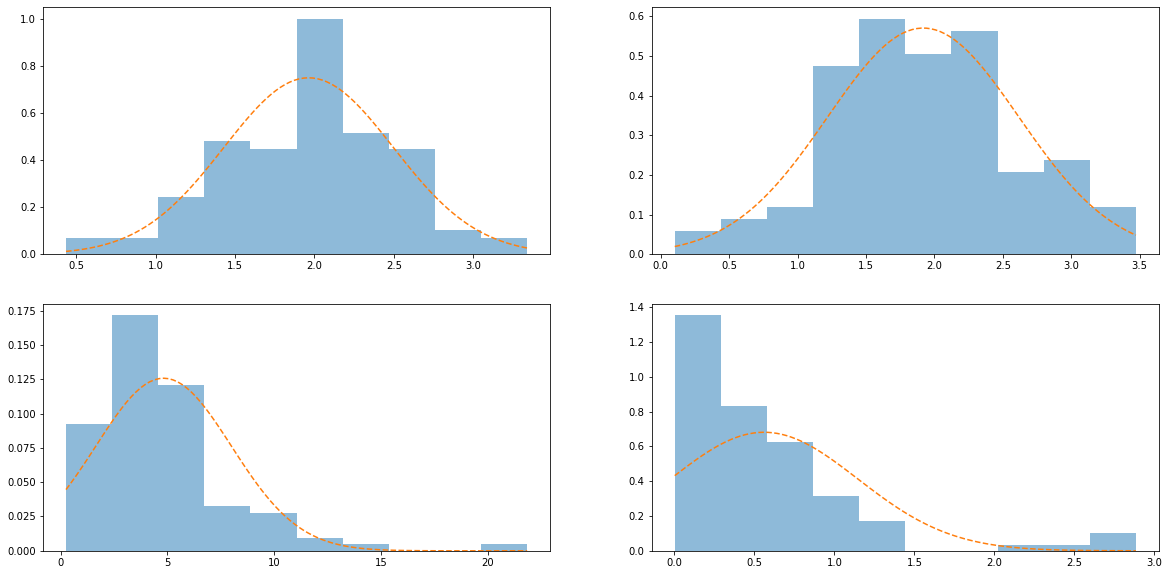

In [29]:
# histogram z naniesionym filtrem rozkładu normalnego
m1, s1 = stats.norm.fit(norm)
print(m1, s1)
m2, s2 = stats.norm.fit(norm_error)
print(m2, s2)
m3, s3 = stats.norm.fit(chi)
print(m3, s3)
m4, s4 = stats.norm.fit(exp)
print(m4, s4)

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
N_bins = 10

x_range = np.linspace(norm.min(), norm.max(), 100)
ax[0, 0].hist(norm, bins=N_bins, density=True, alpha=0.5)
ax[0, 0].plot(x_range, stats.norm.pdf(x_range, m1, s1), '--')

x_range = np.linspace(norm_error.min(), norm_error.max(), 100)
ax[0, 1].hist(norm_error, bins=N_bins, density=True, alpha=0.5)
ax[0, 1].plot(x_range, stats.norm.pdf(x_range, m2, s2), '--')

x_range = np.linspace(chi.min(), chi.max(), 100)
ax[1, 0].hist(chi, bins=N_bins, density=True, alpha=0.5)
ax[1, 0].plot(x_range, stats.norm.pdf(x_range, m3, s3), '--')

x_range = np.linspace(exp.min(), exp.max(), 100)
ax[1, 1].hist(exp, bins=N_bins, density=True, alpha=0.5)
ax[1, 1].plot(x_range, stats.norm.pdf(x_range, m4, s4), '--')

In [ ]:
?sm.qqplot

ShapiroResult(statistic=0.989964485168457, pvalue=0.6617213487625122)


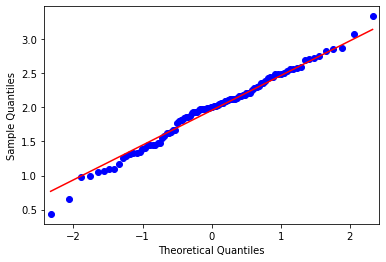

In [30]:
sm.qqplot(norm, stats.norm, line='q')
print(stats.shapiro(norm))
plt.show()

ShapiroResult(statistic=0.988908052444458, pvalue=0.5773555040359497)


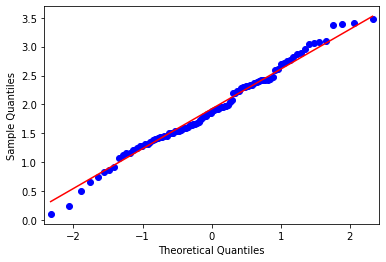

In [34]:
sm.qqplot(norm_error, stats.norm, line='q')
print(stats.shapiro(norm_error))
plt.show()

ShapiroResult(statistic=0.8401163816452026, pvalue=5.20257437131022e-09)


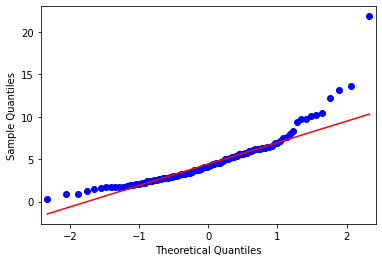

In [36]:
sm.qqplot(chi, stats.norm, line='q')
print(stats.shapiro(chi))
plt.show()

ShapiroResult(statistic=0.7691559791564941, pvalue=3.100951787016193e-11)


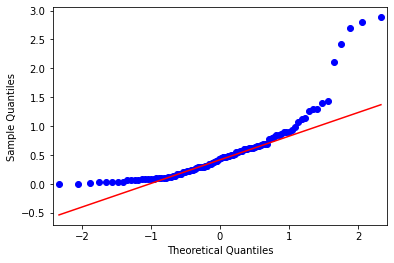

In [37]:
sm.qqplot(exp, stats.norm, line='q')
print(stats.shapiro(exp))
plt.show()

## ***Inne testy do badania normalności

* testy oparte na kurtozie i skośności:
    - [test D'Agostino $K^2$](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test): `scipy.stats.normaltest`;

    - [test Jarque–Bera](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test): `scipy.stats.jarque_bera`;
    
* testy oparte na dystrybuancie empirycznej:
    - [test Kolmogorova–Smirnova](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test): `scipy.stats.kstest`;
    
    - [test Lilliefors](https://en.wikipedia.org/wiki/Lilliefors_test): `statsmodels.stats.diagnostic.lilliefors`;

## Test typu omnibus D’Agostino-Pearsona oparty o kurtozę i skośność
Łącząc dwa testy otrzymuje się test czuły na odstępstwa od normalności zarówno w postaci niezerowej skośności jak i kurtozy istotnie różniej od 3.

Statystyką testową jest
$$
K^2=(Z(\sqrt{b_1}))^2+ (Z(b_2))^2,
$$
gdzie $Z(\sqrt{b_1})$ to  statystyka  testowa  testu  opartego  o  skośność  a $Z(b_2)$  to  statystyka  testowa  testu opartego o kurtozę.

Asymptotyczny rozkład tej statystyki to rozkład $\chi^2$.

Ponadto:
$m_k = \frac{1}{n}\sum_{i=1}^n (x_i -\overline{x})^k$, $\sqrt{b_1} = \frac{m_3}{m_2^{3/2}}$, $b_2 = \frac{m4}{m_2^2}-3$.

## Test typu omnibus Jarque-Bera oparty o kurtozę i skośność
Innym testem opartym o kurtozę i skośność jest test Jarque-Bera. Statystyka testowaw przypadku tego testu ma łatwiejszą postać niż dla testu D’Agostino-Pearsona. Traci się jednak na niedokładnym oszacowaniu wartości krytycznych przy niewielkich wielkościach próby. Asymptotycznie ten test jest tak samo mocny jak test D’Agostino-Pearsona, ale na asymptotykę można liczyć jedynie w przypadku dużych prób.

Statystyka testowa ma postać:
$$
    \text{JB} = \frac{n}{6}\Big((\sqrt{b_1})^2 + \frac{1}{4}(b_2-3)^2\Big).
$$


## Test Kołmogorova-Smirnova

Test oparty o odległość supremum pomiędzy dystrybuantami empiryczną $F_n$ i teoretyczną $F$
$$
d(F_n, F) = \sup_{x}|F_n(x) - F(x)|.
$$

Statystka testowa oparta o powyższą odległość sprowadza się do liczenia maksimum modułu różnicy dystrybuant w punktach skoku dystrybuanty empirycznej:
$$
D = \max_{x_i}|F_n(x_i) - F(x_i)|.
$$

Rozkład statystyki testowej można wyznaczyć w sposób dokładny dla prostej hipotezy zerowej, a więc dla porównania z jednym określonym rozkładem. Asymptotycznie, ta statystyka przemnożona przez $\sqrt{n}$ ma rozkład Kołmogorowa.

Test ten pomimo łatwego opisu probabilistycznego nie jest stosowany z uwagi na moc niższą niż konkurencja.

## Test Lillieforsa

Ten test to modyfikacja testu Kołmogorowa-Smirnowa zaproponowana przez Huberta Lillieforsa, pozwalająca na testowanie zgodności z całą rodziną rozkładów normalnych, bez znajomości parametrów średniej i odchylenia standardowego (test Kołmogorowa-Smirnowa pozwala na zbadanie zgodnościz jednym określonym rozkładem).

Statystyka testowa w przypadku testu Lillieforsa wygląda tak samo jak w przypadku testu Kołmogorowa-Smirnowa. Różnica polega na zastosowaniu innego rozkładu dla statystyki testowej (przybliżenie rozkładu dokładnego), uwzględniającego to, że hipoteza zerowa jest hipotezą złożoną.

In [ ]:
?stats.normaltest

In [38]:
stats.normaltest(norm_error)

NormaltestResult(statistic=0.038959424831917305, pvalue=0.9807087911988661)

In [39]:
stats.normaltest(chi)

NormaltestResult(statistic=63.296808159827634, pvalue=1.8000010027815444e-14)

In [ ]:
?stats.jarque_bera

In [40]:
stats.jarque_bera(norm_error)

Jarque_beraResult(statistic=0.12474987612898653, pvalue=0.939530554976097)

In [41]:
stats.jarque_bera(chi)

Jarque_beraResult(statistic=295.69092580671173, pvalue=0.0)

In [ ]:
?stats.kstest

In [43]:
norm_error_stand = (norm_error - np.mean(norm_error)) / np.std(norm_error, ddof=1)
stats.kstest(norm_error_stand, 'norm')

KstestResult(statistic=0.062478740762629714, pvalue=0.8065551433794752)

In [ ]:
?sm_stats.diagnostic.lilliefors

In [45]:
sm_stats.diagnostic.lilliefors(norm_error, 'norm')

(0.062478740762629714, 0.4440795891292383)

## Zadanie
Napisz funkcję, która dla dowolnej próbki zwróci ramkę danych z wyznaczonymi statystykami testowymi i $p$-wartościami dla poznanych testów normalności.

In [ ]:
def normal_tests(x):
    pass

## Zadanie
Wczytaj dane `mtcars.csv` i sprawdź normalność każdej z kolumn (za pomocą testów statystycznych oraz metod graficznych). 

In [ ]:
mtcars = pd.read_csv("../data/mtcars.csv")
mtcars.head()